In [20]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
df = pd.read_csv('newdataset.csv')



In [21]:
correlation_matrix = df.corr()

In [22]:
print(correlation_matrix)

                                                    Occurrence of nausea  \
Occurrence of nausea                                            1.000000   
Lumbar pain                                                     0.477105   
Urine pushing (continuous need for urination)                  -0.013765   
Micturition pains                                               0.574007   
Burning of urethra, itch, swelling of urethra o...             -0.121744   
Inflammation of urinary bladder                                 0.184630   
Nephritis of renal pelvis origin                                0.667947   
UTI                                                            -0.096353   

                                                    Lumbar pain  \
Occurrence of nausea                                   0.477105   
Lumbar pain                                            1.000000   
Urine pushing (continuous need for urination)         -0.239046   
Micturition pains                              

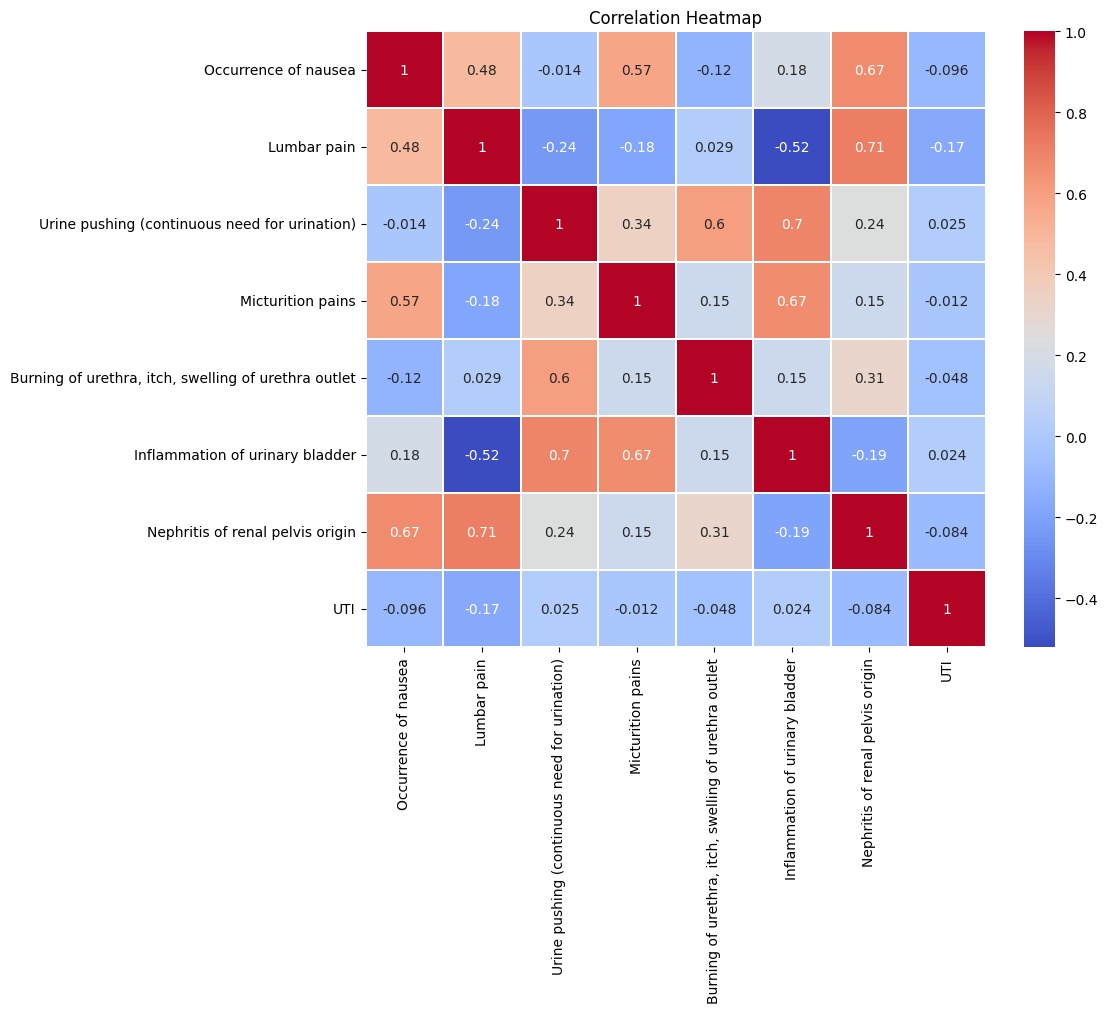

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.1)
plt.title('Correlation Heatmap')
plt.show()

In [24]:
df.head()

,Occurrence of nausea,Lumbar pain,Urine pushing (continuous need for urination),Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",Inflammation of urinary bladder,Nephritis of renal pelvis origin,UTI
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
df = df.drop(120)

In [7]:

X = df[['Occurrence of nausea', 'Lumbar pain', 'Urine pushing (continuous need for urination)', 'Micturition pains', 'Burning of urethra, itch, swelling of urethra outlet', 'Inflammation of urinary bladder', 'Nephritis of renal pelvis origin']]


In [8]:
y =df[['UTI']]

In [9]:
imputer = SimpleImputer(strategy='most_frequent')
y = imputer.fit_transform(y.values.reshape(-1, 1)).flatten()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
svm_model = SVC()


In [13]:
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = svm_model.score(X_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [14]:
new_patient = {
    'Occurrence of nausea': 0,
    'Lumbar pain': 0,
    'Urine pushing (continuous need for urination)': 0,
    'Micturition pains': 0,
    'Burning of urethra, itch, swelling of urethra outlet': 0,
    'Inflammation of urinary bladder': 0,
    'Nephritis of renal pelvis origin': 0
}


In [15]:
new_patient_df = pd.DataFrame([new_patient])


In [16]:
prediction = svm_model.predict(new_patient_df)

In [17]:
prediction_label = 'UTI' if prediction[0] == 0 else 'No UTI'

In [18]:
print(f"Prediction: {prediction_label}")

Prediction: No UTI
